# Experiment using the Nudging module

This notebook uses the nudging module, experiment config and files, to run a full end2end experiment.

In [2]:
import sys
import os
from pathlib import Path

# go to project root
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [3]:
from nudging.models import OllamaClient
from nudging.data_loader import load_data
from nudging.experiment import run_single_experiment
import configs.experiment_config as experiment_config

In [4]:
import pandas as pd

Lets start the model and get all the experiment details.

In [5]:
#config = experiment_config.EXPERIMENT_BASELINE
config = experiment_config.EXPERIMENT_EXTENDED
print(f"Running experiment: {config.name}")
print(f"Context percentages: {config.context_percentages}")

Running experiment: memorisation_extended
Context percentages: [5, 25, 50, 75, 90]


In [6]:
client = OllamaClient(model=config.model_config.name)
print(f"Model initialised: {config.model_config.name}")

Model initialised: qwen3:0.6b


Now lets load our data.

In [7]:
dataset = load_data(
    base_dir=project_root / config.data_config.data_folder_name,
    min_words=config.data_config.min_word_count,
    max_samples=config.max_samples
)
print(f"loaded the data: {len(dataset)} files.")

loaded the data: 3 files.


## Lets start experimenting!

In [8]:
from experiments.run_memorisation_experiment import run_experiment

experiment_results = run_experiment(
    experiment_config=config, 
    model_config=config.model_config,
    client=client, 
    dataset=dataset
)

INFO:experiments.run_memorisation_experiment:iterating over the loaded data....
INFO:experiments.run_memorisation_experiment:starting with: podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins
INFO:experiments.run_memorisation_experiment:=====>5%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins",
  "percentage": 5,
  "context_words": 1372,
  "target_words": 26074,
  "generated_words": 120,
  "exact_match": 0.00037552989434610855,
  "fuzzy_match": 0.009988071799146292,
  "token_overlap": 0.016889131026968127,
  "semantic_similarity": 0.2326064109802246
}
INFO:experiments.run_memorisation_experiment:=====>25%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins",
  "percentage": 25,
  "context_words": 6861,
  "target_words": 20585,
  "generated_words": 225,
  "exact_match": 0.0008099008099008099,
  "fuzzy_match": 0.020196196773292763,
  "token_overlap": 0.00900032144005143,
  "semantic_similarity": 0.25259190797805786
}
INFO:experiments.run_memorisation_experiment:=====>50%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins",
  "percentage": 50,
  "context_words": 13723,
  "target_words": 13723,
  "generated_words": 263,
  "exact_match": 0.0014666539918790826,
  "fuzzy_match": 0.03610907393826257,
  "token_overlap": 0.04560530679933665,
  "semantic_similarity": 0.40196070075035095
}
INFO:experiments.run_memorisation_experiment:=====>75%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins",
  "percentage": 75,
  "context_words": 20584,
  "target_words": 6862,
  "generated_words": 420,
  "exact_match": 0.004056413700470114,
  "fuzzy_match": 0.11095911232710144,
  "token_overlap": 0.09068776628119293,
  "semantic_similarity": 0.3224320411682129
}
INFO:experiments.run_memorisation_experiment:=====>90%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins",
  "percentage": 90,
  "context_words": 24701,
  "target_words": 2745,
  "generated_words": 341,
  "exact_match": 0.009168172388409288,
  "fuzzy_match": 0.1936214605067064,
  "token_overlap": 0.10228509249183895,
  "semantic_similarity": 0.4767023026943207
}
INFO:experiments.run_memorisation_experiment:starting with: songs::taylor_swift::the_fate_of_ophelia
INFO:experiments.run_memorisation_experiment:=====>5%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::the_fate_of_ophelia",
  "percentage": 5,
  "context_words": 21,
  "target_words": 411,
  "generated_words": 36,
  "exact_match": 0.005917159763313609,
  "fuzzy_match": 0.1470721743077621,
  "token_overlap": 0.09154929577464789,
  "semantic_similarity": 0.4711766541004181
}
INFO:experiments.run_memorisation_experiment:=====>25%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::the_fate_of_ophelia",
  "percentage": 25,
  "context_words": 108,
  "target_words": 324,
  "generated_words": 23,
  "exact_match": 0.006748466257668712,
  "fuzzy_match": 0.12089810017271152,
  "token_overlap": 0.16071428571428573,
  "semantic_similarity": 0.6060917377471924
}
INFO:experiments.run_memorisation_experiment:=====>50%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::the_fate_of_ophelia",
  "percentage": 50,
  "context_words": 216,
  "target_words": 216,
  "generated_words": 218,
  "exact_match": 0.08014911463187326,
  "fuzzy_match": 0.605607476635514,
  "token_overlap": 0.4632352941176471,
  "semantic_similarity": 0.8049259185791016
}
INFO:experiments.run_memorisation_experiment:=====>75%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::the_fate_of_ophelia",
  "percentage": 75,
  "context_words": 324,
  "target_words": 108,
  "generated_words": 85,
  "exact_match": 0.07061068702290077,
  "fuzzy_match": 0.4607218683651805,
  "token_overlap": 0.12844036697247707,
  "semantic_similarity": 0.48573073744773865
}
INFO:experiments.run_memorisation_experiment:=====>90%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::the_fate_of_ophelia",
  "percentage": 90,
  "context_words": 388,
  "target_words": 44,
  "generated_words": 146,
  "exact_match": 0.05508474576271186,
  "fuzzy_match": 0.48319327731092426,
  "token_overlap": 0.4155844155844156,
  "semantic_similarity": 0.661978542804718
}
INFO:experiments.run_memorisation_experiment:starting with: songs::taylor_swift::shake_it_off
INFO:experiments.run_memorisation_experiment:=====>5%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::shake_it_off",
  "percentage": 5,
  "context_words": 28,
  "target_words": 532,
  "generated_words": 80,
  "exact_match": 0.008351488743645606,
  "fuzzy_match": 0.18710089399744567,
  "token_overlap": 0.10909090909090909,
  "semantic_similarity": 0.2327810674905777
}
INFO:experiments.run_memorisation_experiment:=====>25%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::shake_it_off",
  "percentage": 25,
  "context_words": 140,
  "target_words": 420,
  "generated_words": 30,
  "exact_match": 0.0051764705882352945,
  "fuzzy_match": 0.14572425828970337,
  "token_overlap": 0.056,
  "semantic_similarity": 0.5044809579849243
}
INFO:experiments.run_memorisation_experiment:=====>50%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::shake_it_off",
  "percentage": 50,
  "context_words": 280,
  "target_words": 280,
  "generated_words": 153,
  "exact_match": 0.048280907095830286,
  "fuzzy_match": 0.5420981539846916,
  "token_overlap": 0.264,
  "semantic_similarity": 0.7725746631622314
}
INFO:experiments.run_memorisation_experiment:=====>75%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::shake_it_off",
  "percentage": 75,
  "context_words": 420,
  "target_words": 140,
  "generated_words": 121,
  "exact_match": 0.057057057057057055,
  "fuzzy_match": 0.6952303961196443,
  "token_overlap": 0.25,
  "semantic_similarity": 0.6922177672386169
}
INFO:experiments.run_memorisation_experiment:=====>90%
INFO:nudging.experiment:running all experiments
INFO:nudging.experiment:generating a response via model client.
INFO:nudging.experiment:splitting text.
INFO:nudging.metrics:calculating exact match
INFO:nudging.metrics:calculating fuzzy match
INFO:nudging.metrics:calculating token overlap
INFO:nudging.metrics:calculating semantic similarity


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:experiments.run_memorisation_experiment:Experiment results: {
  "content": "songs::taylor_swift::shake_it_off",
  "percentage": 90,
  "context_words": 504,
  "target_words": 56,
  "generated_words": 41,
  "exact_match": 0.08849557522123894,
  "fuzzy_match": 0.7577319587628866,
  "token_overlap": 0.6363636363636364,
  "semantic_similarity": 0.9608675837516785
}


In [9]:
experiment_results

[{'content': 'podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins',
  'percentage': 5,
  'context_words': 1372,
  'target_words': 26074,
  'generated_words': 120,
  'exact_match': 0.00037552989434610855,
  'fuzzy_match': 0.009988071799146292,
  'token_overlap': 0.016889131026968127,
  'semantic_similarity': 0.2326064109802246},
 {'content': 'podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins',
  'percentage': 25,
  'context_words': 6861,
  'target_words': 20585,
  'generated_words': 225,
  'exact_match': 0.0008099008099008099,
  'fuzzy_match': 0.020196196773292763,
  'token_overlap': 0.00900032144005143,
  'semantic_similarity': 0.25259190797805786},
 {'content': 'podcasts::huberman::how_to_build_immense_inner_strength_David_Goggins',
  'percentage': 50,
  'context_words': 13723,
  'target_words': 13723,
  'generated_words': 263,
  'exact_match': 0.0014666539918790826,
  'fuzzy_match': 0.03610907393826257,
  'token_overlap': 0.04560530679933665,
  '

In [10]:
# Convert to DataFrame
df_results = pd.DataFrame(experiment_results)
df_results

,content,percentage,context_words,target_words,generated_words,exact_match,fuzzy_match,token_overlap,semantic_similarity
0,podcasts::huberman::how_to_build_immense_inner...,5,1372,26074,120,0.000376,0.009988,0.016889,0.232606
1,podcasts::huberman::how_to_build_immense_inner...,25,6861,20585,225,0.000810,0.020196,0.009000,0.252592
2,podcasts::huberman::how_to_build_immense_inner...,50,13723,13723,263,0.001467,0.036109,0.045605,0.401961
3,podcasts::huberman::how_to_build_immense_inner...,75,20584,6862,420,0.004056,0.110959,0.090688,0.322432
4,podcasts::huberman::how_to_build_immense_inner...,90,24701,2745,341,0.009168,0.193621,0.102285,0.476702
5,songs::taylor_swift::the_fate_of_ophelia,5,21,411,36,0.005917,0.147072,0.091549,0.471177
6,songs::taylor_swift::the_fate_of_ophelia,25,108,324,23,0.006748,0.120898,0.160714,0.606092
7,songs::taylor_swift::the_fate_of_ophelia,50,216,216,218,0.080149,0.605607,0.463235,0.804926
8,songs::taylor_swift::the_fate_of_ophelia,75,324,108,85,0.070611,0.460722,0.128440,0.485731
9,songs::taylor_swift::the_fate_of_ophelia,90,388,44,146,0.055085,0.483193,0.415584,0.661979


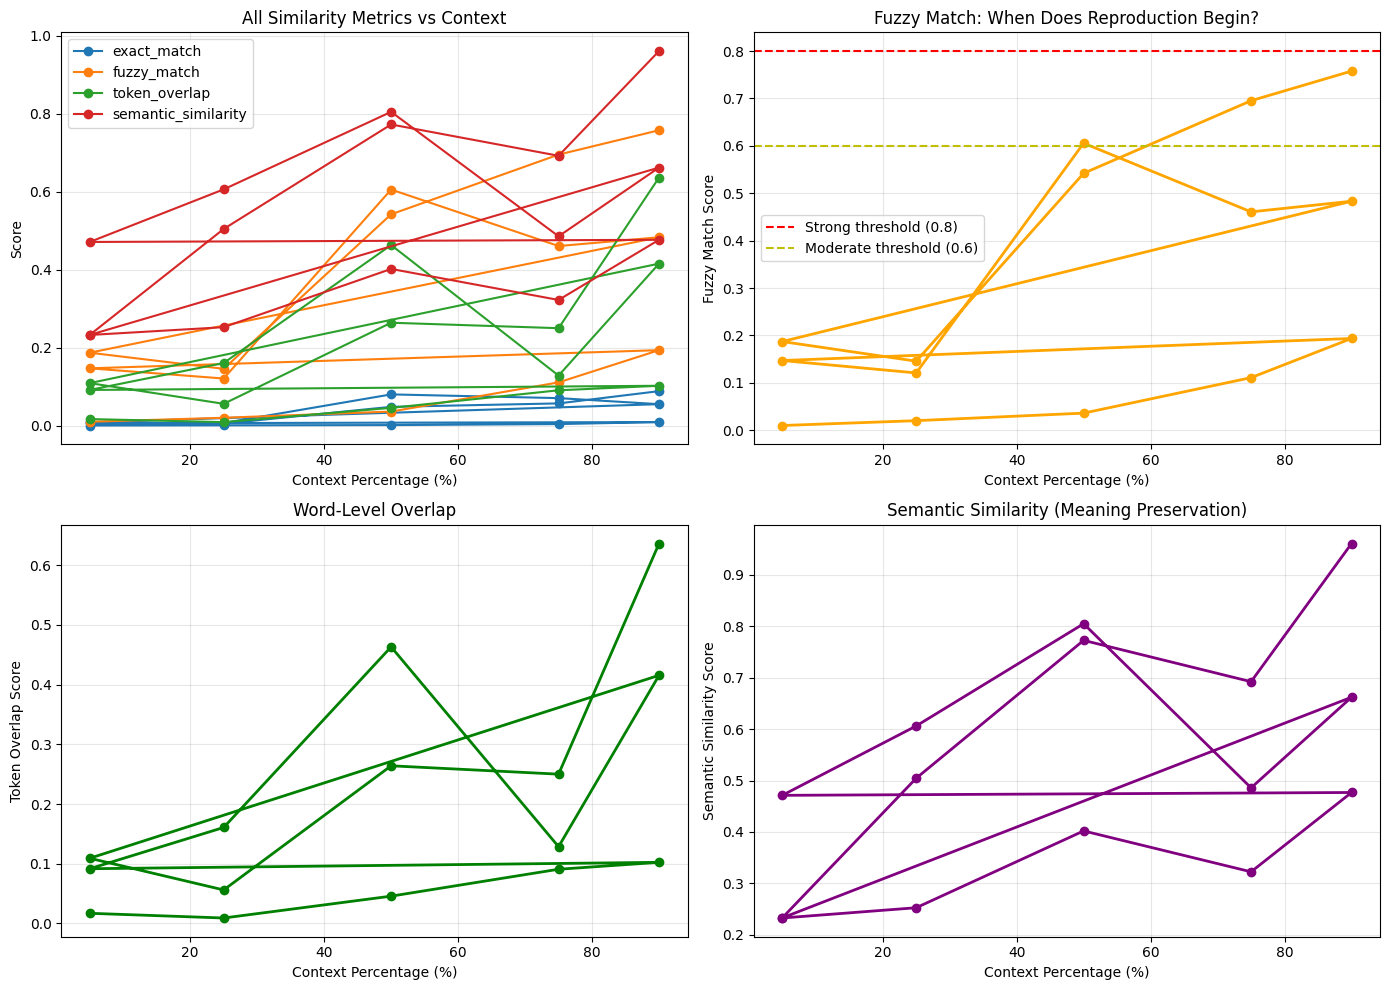

In [11]:
import matplotlib.pyplot as plt

# Cell 7: Visualize Results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: All metrics vs percentage
ax1 = axes[0, 0]
metrics_to_plot = ['exact_match', 'fuzzy_match', 'token_overlap', 'semantic_similarity']
for metric in metrics_to_plot:
    ax1.plot(df_results['percentage'], df_results[metric], marker='o', label=metric)
ax1.set_xlabel('Context Percentage (%)')
ax1.set_ylabel('Score')
ax1.set_title('All Similarity Metrics vs Context')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Fuzzy match focus
ax2 = axes[0, 1]
ax2.plot(df_results['percentage'], df_results['fuzzy_match'], marker='o', linewidth=2, color='orange')
ax2.axhline(y=0.8, color='r', linestyle='--', label='Strong threshold (0.8)')
ax2.axhline(y=0.6, color='y', linestyle='--', label='Moderate threshold (0.6)')
ax2.set_xlabel('Context Percentage (%)')
ax2.set_ylabel('Fuzzy Match Score')
ax2.set_title('Fuzzy Match: When Does Reproduction Begin?')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Token overlap
ax3 = axes[1, 0]
ax3.plot(df_results['percentage'], df_results['token_overlap'], marker='o', linewidth=2, color='green')
ax3.set_xlabel('Context Percentage (%)')
ax3.set_ylabel('Token Overlap Score')
ax3.set_title('Word-Level Overlap')
ax3.grid(True, alpha=0.3)

# Plot 4: Semantic similarity
ax4 = axes[1, 1]
ax4.plot(df_results['percentage'], df_results['semantic_similarity'], marker='o', linewidth=2, color='purple')
ax4.set_xlabel('Context Percentage (%)')
ax4.set_ylabel('Semantic Similarity Score')
ax4.set_title('Semantic Similarity (Meaning Preservation)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
